## Одномерная акустика без матриц

In [61]:
import numpy as np
from matplotlib import pyplot as plt

rho0 = 0.25
c0=2
h=0.05
Cu=1
dt = Cu*h/c0

ul,pl = 1,5
ur,pr = 0,2

x = np.arange(-2-h,2+h,h)
u = np.zeros_like(x)
p = u.copy()

In [62]:
def get_BV(ul,ur,pl,pr):
    global rho0, c0
    U = (ul+ur)/2 - 0.5*(pr-pl)/(rho0*c0)
    P = (pl+pr)/2 - 0.5*(ur-ul)*(rho0*c0)
    return U,P

In [63]:
left = np.where(x<=0)
right = np.where(x>0)

In [64]:
u[left], p[left] = ul,pl
u[right], p[right] = ur,pr

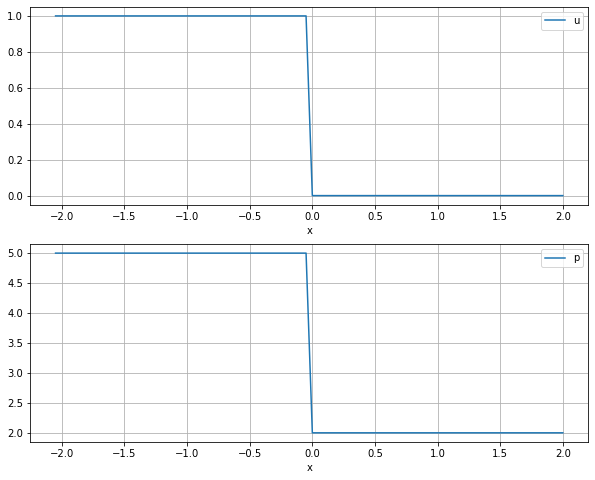

In [65]:
fix,axs = plt.subplots(2,1,figsize=(10,8))

axs[0].plot(x,u, label='u')
axs[1].plot(x,p,label='p')
axs[0].set_label('u')
axs[1].set_label('p')

for ax in axs:
    ax.set_xlabel('x')
    ax.legend()
    
    ax.grid(True)

In [66]:
get_BV(u[:-1],u[1:],p[:-1],p[1:])

(array([1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ,
        1. , 3.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ]),
 array([5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
        5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
        5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  ,
        5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 5.  , 3.75, 2.  , 2.  , 2.  ,
        2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
        2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
        2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  , 2.  ,
        2.  , 2.  ,

In [67]:
def godunov(u,p,nt,dt,dx):
    global rho0,c0
    un = np.zeros((nt,len(u)))
    pn = np.zeros((nt,len(p)))
    
    un[0,:] = u.copy()
    pn[0,:] = p.copy()    
    
    for t in range(1, nt):
        U,P = get_BV(u[:-1],u[1:],p[:-1],p[1:])
        
        un[t,1:-1] = u[1:-1] - dt/dx*(P[1:]-P[:-1])/rho0
        pn[t,1:-1] = p[1:-1] - dt/dx*rho0*c0**2*(U[1:]-U[:-1])
        
        un[t,0], un[t,-1] = u[0],u[-1]
        pn[t,0], pn[t,-1] = p[0],p[-1]
        
        u = un[t].copy()
        p = pn[t].copy()
        
    return un,pn

In [68]:
nt = 25
un,pn = godunov(u,p,nt,dt,h)

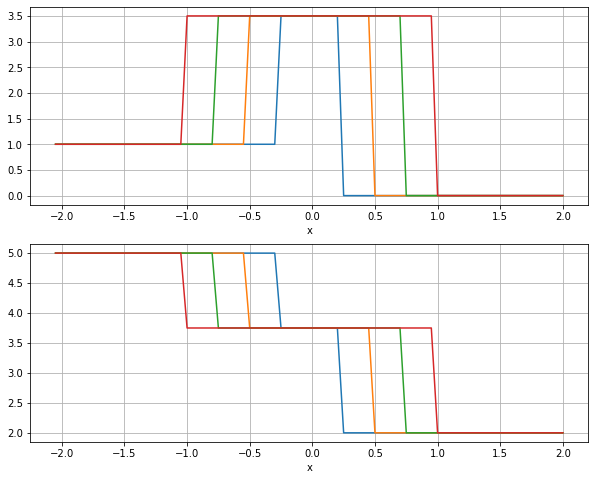

In [69]:
fix,axs = plt.subplots(2,1,figsize=(10,8))

for step in (5,10,15,20):
    axs[0].plot(x,un[step], label='u')
    axs[1].plot(x,pn[step],label='p')
    
axs[0].set_label('u')
axs[1].set_label('p')

for ax in axs:
    ax.set_xlabel('x')
    ax.grid(True)